October 2020 This notebook is developed by OPA Towobola to explore and organize data and analysis on world trends. The main spheres of inqiry are in energy (production, consumption), health (longevity and disease rates) and development (urbanization and GDP). The initial intent is to link these, so as to determine linkages. One question that could be answered is whether urbanization trends are promoting better or worse health. A similar question that could be answered is whether promiximity to energy sources (power lines) is linked to health trends for any demograhic group in particular. Note: IT is not intended that the TYPE 1 error rate would be checked against a p-value threshold of 0.05 for health indicators. That is because a family would want the threshold to be much higher, when it pertains to their health or the health of a family member.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [5]:
life_health=pd.read_csv('life-expectancy-vs-healthcare-expenditure.csv')

In [80]:
life_health.tail()

Entity Code  Year  Total population (Gapminder, HYDE & UN)  \
49529       Zimbabwe  ZWE  2016                               14030000.0   
49530       Zimbabwe  ZWE  2017                               14237000.0   
49531       Zimbabwe  ZWE  2018                               14439000.0   
49532       Zimbabwe  ZWE  2019                               14645000.0   
49533  Åland Islands  ALA  2015                                      NaN   

      Continent  \
49529       NaN   
49530       NaN   
49531       NaN   
49532       NaN   
49533    Europe   

       Health expenditure per capita, PPP (constant 2011 international $)  \
49529                                                NaN                    
49530                                                NaN                    
49531                                                NaN                    
49532                                                NaN                    
49533                                                NaN                    

       Life expectancy at birth, total (years)  
49529                                   61.163  
49530                                      NaN  
49531                                      NaN  
49532                                      NaN  
49533                                      NaN

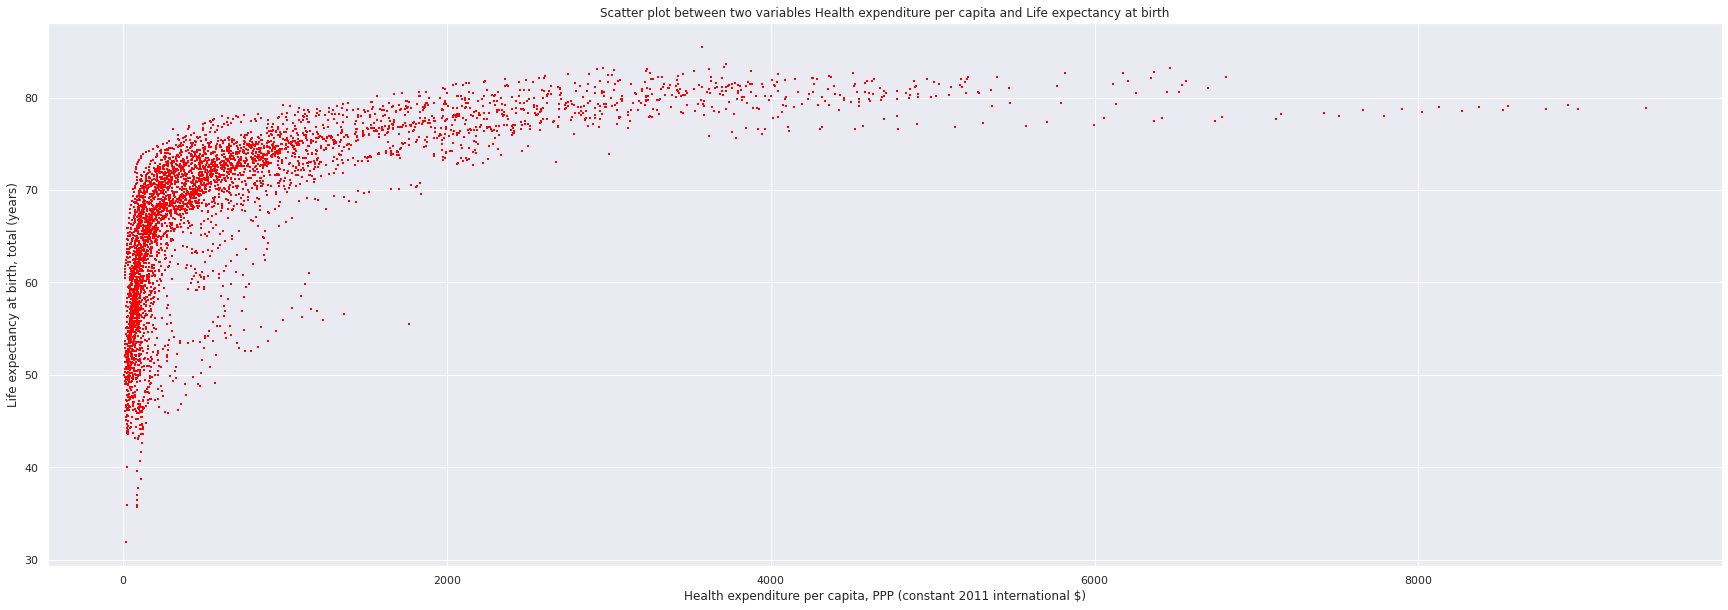

In [67]:
life_health.plot.scatter(x='Health expenditure per capita, PPP (constant 2011 international $)', y='Life expectancy at birth, total (years)', title= "Scatter plot between two variables Health expenditure per capita and Life expectancy at birth",figsize=(30,10), color = 'red', marker= '+', s = 3.0)


plot.show(block=True);

In [85]:
life_health_regions=pd.read_csv('life-expectancy-vs-healthcare-expenditure_regions.csv')

In [137]:
regions = ['Africa', 'Arab World','Asia','Europe','Latin America','North Amercia','Oceania','Central Europe and the Baltics','East Asia & Pacific','Euro area','Europe & Central Asia','Heavily indebted poor countries (HIPC)']
life_health_regions.Entity.isin(regions)
life_health_subregions= life_health_regions[life_health_regions.Entity.isin(regions)]

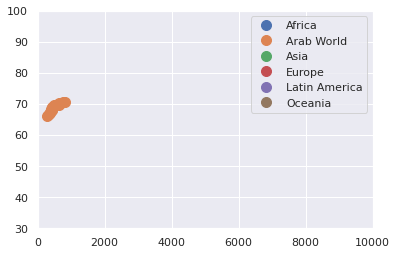

In [116]:
groups = life_health_subregions.groupby('Entity')

# Plot
fig, ax = plt.subplots() 
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.iloc[:,5], group.iloc[:,6], marker='o', linestyle='', ms=10, label=name)
    #print(group.iloc[:,5],)
ax.legend()
plt.xlim(0, 10000)
plt.ylim(30, 100)
#plt.figure(figsize=(1,1))
plt.show()

In [138]:
import plotly.graph_objects as go
import plotly.express as px

#fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
#fig.show()

groups = life_health_subregions.groupby('Entity')

# Plot
#fig = go.Figure(data=go.Bar(x=group.iloc[:,5], y=group.iloc[:,6]))
#fig = px.scatter_matrix(life_health_subregions.iloc[:,5], life_health_subregions.iloc[:,6])

#for name, group in groups:
    #fig = go.Figure(data=go.Bar(x=group.iloc[:,5], y=group.iloc[:,6]))
    #print(group.iloc[:,5],)
#ax.legend()
#plt.xlim(0, 10000)
#plt.ylim(30, 100)
#plt.figure(figsize=(1,1))

fig = px.scatter_matrix(life_health_subregions,dimensions=["Health expenditure per capita, PPP (constant 2011 international $)", "Life expectancy at birth, total (years)"], color="Entity",labels={col:col.replace('per capita, PPP (constant 2011 international $)', ' ') for col in life_health_subregions.columns},title="Life expectancy at birth as it varies with Health Expenditures per capita, by World region")
fig.show()


In [20]:
non_com_disease=pd.read_csv('disease-burden-from-ncds.csv')

In [21]:
non_com_disease.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)  \
0                                       1.174287e+06                                                       
1                                       1.185606e+06                                                       
2                                       1.235672e+06                                                       
3                                       1.299673e+06                                                       
4                                       1.342037e+06                                                       

   DALYs (Disability-Adjusted Life Years) - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)  \
0                                      210321.708287                                                            
1                                      212742.935274                                                            
2                                      226520.545922                                                            
3                                      243686.778641                                                            
4                                      253746.405817                                                            

   DALYs (Disability-Adjusted Life Years) - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)  \
0                                       47664.860070                                                                          
1                                       48075.487038                                                                          
2                                       50692.515102                                                                          
3                                       54572.494444                                                                          
4                                       57420.824332                                                                          

   DALYs (Disability-Adjusted Life Years) - Digestive diseases - Sex: Both - Age: All Ages (Number)  \
0                                      168460.968306                                                  
1                                      170894.853788                                                  
2                                      185327.687769                                                  
3                                      207638.613618                                                  
4                                      221799.066597                                                  

   DALYs (Disability-Adjusted Life Years) - Musculoskeletal disorders - Sex: Both - Age: All Ages (Number)  \
0                                      136719.988330                                                         
1                                      139315.558761                                                         
2                                      153441.814466                                                         
3                                      168410.654642                                                         
4                                      172883.534175                                                         

   DALYs (Disability-Adjusted Life Years) - Other non-communicable diseases - Sex: Both - Age: All Ages (Number)  \
0                                       8.245401e+05                                                               
1                                       8.120434e+05                                                               
2                                       8.583162e+05                                                              

In [46]:
(non_com_disease.iloc[:,2]).values

array([1990, 1991, 1992, ..., 2015, 2016, 2017])

In [45]:
(non_com_disease.iloc[:,3:]).values

array([[1174286.76049134,  210321.70828738,   47664.86007002, ...,
         165265.31328711,  329602.124118  ,  309041.85942687],
       [1185605.59086995,  212742.93527427,   48075.48703811, ...,
         172773.23251837,  344649.493365  ,  311985.09105824],
       [1235672.24485902,  226520.54592193,   50692.51510166, ...,
         205121.06742851,  367629.487332  ,  330363.07588089],
       ...,
       [ 469693.55012078,  167516.81203205,   48941.48690827, ...,
         169236.93465686,  291238.274321  ,  351827.40212094],
       [ 470597.90851432,  170500.71036222,   48858.88417645, ...,
         173356.49240438,  300374.828853  ,  358516.18049056],
       [ 474015.32928672,  174027.16193697,   49575.80973339, ...,
         177696.85044083,              nan,  363645.53275601]])

In [54]:
import seaborn as sns
sns.set()

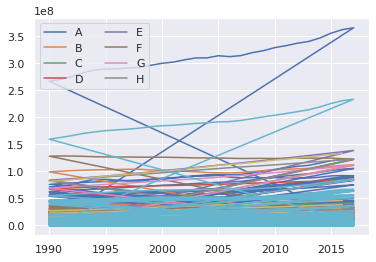

In [56]:
plt.plot((non_com_disease.iloc[:,2]).values, (non_com_disease.iloc[:,3:]).values)
plt.legend('ABCDEFGH', ncol=2, loc='upper left');

In [27]:
colnames=list(non_com_disease.columns)

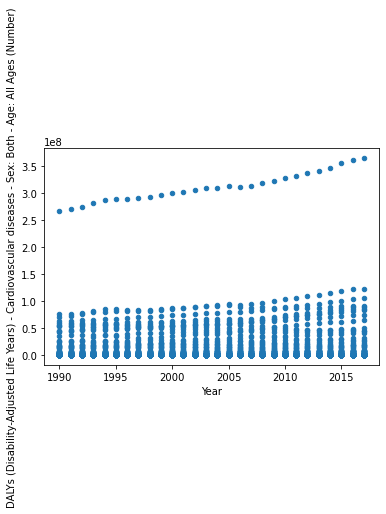

In [38]:
non_com_disease.plot.scatter(x='Year',y='DALYs (Disability-Adjusted Life Years) - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)')


In [ ]:
non_com_disease.plot.scatter(x='Year',y=['DALYs (Disability-Adjusted Life Years) - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Digestive diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Musculoskeletal disorders - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Other non-communicable diseases - Sex: Both - Age: All Ages (Number)'])

In [ ]:


['DALYs (Disability-Adjusted Life Years) - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Digestive diseases - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Musculoskeletal disorders - Sex: Both - Age: All Ages (Number)', 'DALYs (Disability-Adjusted Life Years) - Other non-communicable diseases - Sex: Both - Age: All Ages (Number)'], title= "Scatter plot between two variables Year and Disability Adjusted Life Years");


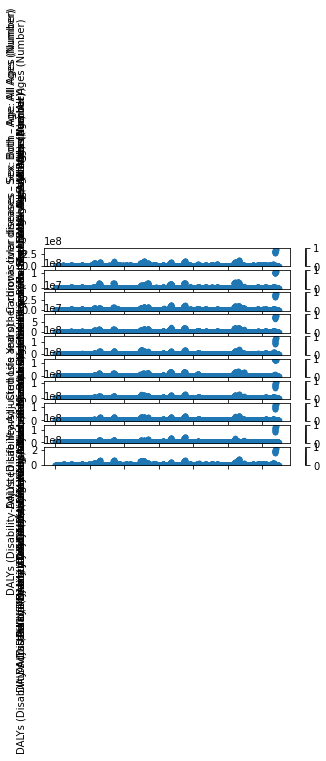

In [36]:
colnames = list (non_com_disease.columns)
fig, axes = plot.subplots(nrows=len(colnames)-3, sharex = True,figsize = (5.5,4),)

for i, ax in enumerate(axes):
    non_com_disease.reset_index().plot(x="index", y=colnames[i+3], kind = 'scatter', legend=False, 
                          ax=ax,  cmap="inferno")

plot.show()

In [29]:
combined=pd.read_csv('CombinedHealthDev.csv')

In [3]:
import plotly.graph_objects as go
import plotly.express as px


In [4]:
combined.head()

Entity  Code   Year  Total population (Gapminder, HYDE & UN)  Continent  \
0  Africa   NaN -10000                                 241901.0        NaN   
1  Africa   NaN  -9000                                 342782.0        NaN   
2  Africa   NaN  -8000                                 490284.0        NaN   
3  Africa   NaN  -7000                                 707844.0        NaN   
4  Africa   NaN  -6000                                1031529.0        NaN   

   Health expenditure per capita, PPP (constant 2011 international $)  \
0                                                NaN                    
1                                                NaN                    
2                                                NaN                    
3                                                NaN                    
4                                                NaN                    

   Life expectancy at birth, total (years) Region And Year  Unnamed: 8  \
0                                      NaN    Africa-10000         NaN   
1                                      NaN     Africa-9000         NaN   
2                                      NaN     Africa-8000         NaN   
3                                      NaN     Africa-7000         NaN   
4                                      NaN     Africa-6000         NaN   

   Year.1  ...  Unnamed: 24  Unnamed: 25  Entity.1  Code.1   Year.2  \
0    2019  ...          NaN          NaN    Africa     NaN -10000.0   
1    2019  ...          NaN          NaN    Africa     NaN  -9000.0   
2    2019  ...          NaN          NaN    Africa     NaN  -8000.0   
3    2019  ...          NaN          NaN    Africa     NaN  -7000.0   
4    2019  ...          NaN          NaN    Africa     NaN  -6000.0   

   Total population (Gapminder, HYDE & UN).2  Continent.2  \
0                                   241901.0          NaN   
1                                   342782.0          NaN   
2                                   490284.0          NaN   
3                                   707844.0          NaN   
4                                  1031529.0          NaN   

   GDP per capita, PPP (constant 2011 international $).1  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   Diabetes prevalence (% of population ages 20 to 79).1  Region and year  
0                                                NaN         Africa-10000  
1                                                NaN          Africa-9000  
2                                                NaN          Africa-8000  
3                                                NaN          Africa-7000  
4                                                NaN          Africa-6000  

[5 rows x 34 columns]

In [30]:
combined.rename(columns = {'Health expenditure per capita, PPP (constant 2011 international $)':'Health costs','Life expectancy at birth, total (years)':'Life expectancy','Diabetes prevalence (% of population ages 20 to 79).1':'Diabetes rate'}, inplace = True)
combined.head()

Entity  Code   Year  Total population (Gapminder, HYDE & UN)  Continent  \
0  Africa   NaN -10000                                 241901.0        NaN   
1  Africa   NaN  -9000                                 342782.0        NaN   
2  Africa   NaN  -8000                                 490284.0        NaN   
3  Africa   NaN  -7000                                 707844.0        NaN   
4  Africa   NaN  -6000                                1031529.0        NaN   

   Health costs  Life expectancy Region And Year  Unnamed: 8  Year.1  ...  \
0           NaN              NaN    Africa-10000         NaN    2019  ...   
1           NaN              NaN     Africa-9000         NaN    2019  ...   
2           NaN              NaN     Africa-8000         NaN    2019  ...   
3           NaN              NaN     Africa-7000         NaN    2019  ...   
4           NaN              NaN     Africa-6000         NaN    2019  ...   

   Unnamed: 24  Unnamed: 25  Entity.1  Code.1   Year.2  \
0          NaN          NaN    Africa     NaN -10000.0   
1          NaN          NaN    Africa     NaN  -9000.0   
2          NaN          NaN    Africa     NaN  -8000.0   
3          NaN          NaN    Africa     NaN  -7000.0   
4          NaN          NaN    Africa     NaN  -6000.0   

   Total population (Gapminder, HYDE & UN).2  Continent.2  \
0                                   241901.0          NaN   
1                                   342782.0          NaN   
2                                   490284.0          NaN   
3                                   707844.0          NaN   
4                                  1031529.0          NaN   

   GDP per capita, PPP (constant 2011 international $).1  Diabetes rate  \
0                                                NaN                NaN   
1                                                NaN                NaN   
2                                                NaN                NaN   
3                                                NaN                NaN   
4                                                NaN                NaN   

   Region and year  
0     Africa-10000  
1      Africa-9000  
2      Africa-8000  
3      Africa-7000  
4      Africa-6000  

[5 rows x 34 columns]

In [32]:

#fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
#fig.show()

groups_c = combined.groupby('Entity')

fig = px.scatter_matrix(combined,dimensions=['Health costs', "Life expectancy",'Diabetes rate'], color="Entity",labels={col:col.replace('per capita, PPP (constant 2011 international $)', '') for col in combined.columns},title="Life expectancy, and diabetes prevalence as they vary with Health Expenditures per capita, by World region")
fig.show()
